In [1]:
!pip install phate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.8 MB/s 
     |████████████████████████████████| 416 kB 20.0 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 1.8 MB 29.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from plotnine import *
import matplotlib.pyplot as plt
import phate
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sample_sheet - Sheet1.csv to Sample_sheet - Sheet1.csv
Saving CE_counts.umi.csv to CE_counts.umi.csv


In [4]:
tar = pd.read_csv(io.BytesIO(uploaded['Sample_sheet - Sheet1.csv']))

In [5]:

data = pd.read_csv(io.BytesIO(uploaded['CE_counts.umi.csv']))

In [6]:
tar.shape

(140, 5)

In [7]:
data.head(20)

,gene,CE_1,CE_2,CE_3,CE_4,CE_5,CE_6,CE_7,CE_8,CE_9,...,CE_131,CE_132,CE_133,CE_134,CE_135,CE_136,CE_137,CE_138,CE_139,CE_140
0,WBGene00000001,74,111,211,207,137,275,213,139,151,...,112,89,182,292,61,301,107,340,133,207
1,WBGene00000002,6,7,15,7,9,4,6,8,3,...,1,4,17,17,1,25,10,8,8,9
2,WBGene00000003,6,10,4,7,7,7,4,6,4,...,11,12,30,117,17,25,23,28,46,49
3,WBGene00000004,32,54,69,68,81,140,50,47,38,...,241,98,801,709,303,416,243,392,191,528
4,WBGene00000005,5,1,3,8,8,9,4,4,1,...,9,4,21,14,11,8,6,18,4,13
5,WBGene00000006,1,1,0,3,4,1,4,0,0,...,2,5,11,15,8,7,1,21,1,17
6,WBGene00000007,1,5,3,7,3,6,4,3,6,...,2,1,22,11,8,7,5,12,7,22
7,WBGene00000008,0,1,2,3,1,0,1,0,0,...,3,0,2,12,1,3,0,11,3,5
8,WBGene00000009,0,0,1,0,0,0,0,0,0,...,0,0,1,6,1,0,0,0,0,0
9,WBGene00000010,3,3,0,7,11,2,3,0,3,...,3,8,3,14,6,18,9,10,14,4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46748 entries, 0 to 46747
Columns: 141 entries, gene to CE_140
dtypes: int64(140), object(1)
memory usage: 50.3+ MB


In [9]:
data.dtypes

gene      object
CE_1       int64
CE_2       int64
CE_3       int64
CE_4       int64
           ...  
CE_136     int64
CE_137     int64
CE_138     int64
CE_139     int64
CE_140     int64
Length: 141, dtype: object

In [10]:
t = tar.transpose()
t

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
id,1,2,3,4,5,6,7,8,9,10,...,131,132,133,134,135,136,137,138,139,140
IL_bc,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,...,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG
barcode,AGACTC,AGCTAG,AGCTCA,AGCTTC,CATGAG,CATGCA,CATGTC,CACTAG,CAGATC,TCACAG,...,GTTGAG,GTTGTC,GTGAAG,ACAGAC,ACAGGA,ACCAAC,ACCAGA,ACTCAC,CTCAAC,CTTCAC
day,2,2,2,2,2,2,2,2,2,2,...,10,10,10,10,10,10,10,10,10,10
pheno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bad,bad,bad,bad,bad,bad,bad,bad,bad,bad


In [11]:
ce = ['CE_%s' % i for i in range(1,141)]

In [12]:
t.columns = ce
t

,CE_1,CE_2,CE_3,CE_4,CE_5,CE_6,CE_7,CE_8,CE_9,CE_10,...,CE_131,CE_132,CE_133,CE_134,CE_135,CE_136,CE_137,CE_138,CE_139,CE_140
id,1,2,3,4,5,6,7,8,9,10,...,131,132,133,134,135,136,137,138,139,140
IL_bc,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,...,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG
barcode,AGACTC,AGCTAG,AGCTCA,AGCTTC,CATGAG,CATGCA,CATGTC,CACTAG,CAGATC,TCACAG,...,GTTGAG,GTTGTC,GTGAAG,ACAGAC,ACAGGA,ACCAAC,ACCAGA,ACTCAC,CTCAAC,CTTCAC
day,2,2,2,2,2,2,2,2,2,2,...,10,10,10,10,10,10,10,10,10,10
pheno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bad,bad,bad,bad,bad,bad,bad,bad,bad,bad


In [13]:
res = data.append(t)

In [14]:
res


,gene,CE_1,CE_2,CE_3,CE_4,CE_5,CE_6,CE_7,CE_8,CE_9,...,CE_131,CE_132,CE_133,CE_134,CE_135,CE_136,CE_137,CE_138,CE_139,CE_140
0,WBGene00000001,74,111,211,207,137,275,213,139,151,...,112,89,182,292,61,301,107,340,133,207
1,WBGene00000002,6,7,15,7,9,4,6,8,3,...,1,4,17,17,1,25,10,8,8,9
2,WBGene00000003,6,10,4,7,7,7,4,6,4,...,11,12,30,117,17,25,23,28,46,49
3,WBGene00000004,32,54,69,68,81,140,50,47,38,...,241,98,801,709,303,416,243,392,191,528
4,WBGene00000005,5,1,3,8,8,9,4,4,1,...,9,4,21,14,11,8,6,18,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id,NaN,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
IL_bc,NaN,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,ACATCG,...,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG,TGAGTG
barcode,NaN,AGACTC,AGCTAG,AGCTCA,AGCTTC,CATGAG,CATGCA,CATGTC,CACTAG,CAGATC,...,GTTGAG,GTTGTC,GTGAAG,ACAGAC,ACAGGA,ACCAAC,ACCAGA,ACTCAC,CTCAAC,CTTCAC
day,NaN,2,2,2,2,2,2,2,2,2,...,10,10,10,10,10,10,10,10,10,10


In [15]:
res.drop(["IL_bc","barcode","pheno","id"],axis = 0, inplace=True)

In [16]:
res['gene'].fillna("day", inplace=True)
res.set_index("gene", inplace=True)
res.T

gene,WBGene00000001,WBGene00000002,WBGene00000003,WBGene00000004,WBGene00000005,WBGene00000006,WBGene00000007,WBGene00000008,WBGene00000009,WBGene00000010,...,WBGene00255579,WBGene00255580,WBGene00255581,WBGene00255582,WBGene00255583,WBGene00255584,WBGene00255586,WBGene00255587,WBGene00255588,day
CE_1,74,6,6,32,5,1,1,0,0,3,...,0,0,0,0,0,1,0,0,0,2
CE_2,111,7,10,54,1,1,5,1,0,3,...,0,0,0,0,0,1,0,0,0,2
CE_3,211,15,4,69,3,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,2
CE_4,207,7,7,68,8,3,7,3,0,7,...,0,0,0,0,0,3,0,0,0,2
CE_5,137,9,7,81,8,4,3,1,0,11,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CE_136,301,25,25,416,8,7,7,3,0,18,...,0,0,0,0,0,0,0,0,0,10
CE_137,107,10,23,243,6,1,5,0,0,9,...,0,0,0,0,0,12,0,0,0,10
CE_138,340,8,28,392,18,21,12,11,0,10,...,0,0,0,0,0,4,0,0,0,10
CE_139,133,8,46,191,4,1,7,3,0,14,...,0,0,0,0,0,0,0,0,0,10


In [17]:
final_df = res.T
final_df

gene,WBGene00000001,WBGene00000002,WBGene00000003,WBGene00000004,WBGene00000005,WBGene00000006,WBGene00000007,WBGene00000008,WBGene00000009,WBGene00000010,...,WBGene00255579,WBGene00255580,WBGene00255581,WBGene00255582,WBGene00255583,WBGene00255584,WBGene00255586,WBGene00255587,WBGene00255588,day
CE_1,74,6,6,32,5,1,1,0,0,3,...,0,0,0,0,0,1,0,0,0,2
CE_2,111,7,10,54,1,1,5,1,0,3,...,0,0,0,0,0,1,0,0,0,2
CE_3,211,15,4,69,3,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,2
CE_4,207,7,7,68,8,3,7,3,0,7,...,0,0,0,0,0,3,0,0,0,2
CE_5,137,9,7,81,8,4,3,1,0,11,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CE_136,301,25,25,416,8,7,7,3,0,18,...,0,0,0,0,0,0,0,0,0,10
CE_137,107,10,23,243,6,1,5,0,0,9,...,0,0,0,0,0,12,0,0,0,10
CE_138,340,8,28,392,18,21,12,11,0,10,...,0,0,0,0,0,4,0,0,0,10
CE_139,133,8,46,191,4,1,7,3,0,14,...,0,0,0,0,0,0,0,0,0,10


In [18]:
cols = final_df.columns[:-1]
final_df_1 = final_df
final_df_1[cols]+=1
final_df_1

gene,WBGene00000001,WBGene00000002,WBGene00000003,WBGene00000004,WBGene00000005,WBGene00000006,WBGene00000007,WBGene00000008,WBGene00000009,WBGene00000010,...,WBGene00255579,WBGene00255580,WBGene00255581,WBGene00255582,WBGene00255583,WBGene00255584,WBGene00255586,WBGene00255587,WBGene00255588,day
CE_1,75,7,7,33,6,2,2,1,1,4,...,1,1,1,1,1,2,1,1,1,2
CE_2,112,8,11,55,2,2,6,2,1,4,...,1,1,1,1,1,2,1,1,1,2
CE_3,212,16,5,70,4,1,4,3,2,1,...,1,1,1,1,1,1,1,1,1,2
CE_4,208,8,8,69,9,4,8,4,1,8,...,1,1,1,1,1,4,1,1,1,2
CE_5,138,10,8,82,9,5,4,2,1,12,...,1,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CE_136,302,26,26,417,9,8,8,4,1,19,...,1,1,1,1,1,1,1,1,1,10
CE_137,108,11,24,244,7,2,6,1,1,10,...,1,1,1,1,1,13,1,1,1,10
CE_138,341,9,29,393,19,22,13,12,1,11,...,1,1,1,1,1,5,1,1,1,10
CE_139,134,9,47,192,5,2,8,4,1,15,...,1,1,1,1,1,1,1,1,1,10


In [19]:
X_new = final_df_1[cols]
y_new = final_df_1['day'].astype('int')

In [56]:
y_new

CE_1       2
CE_2       2
CE_3       2
CE_4       2
CE_5       2
          ..
CE_136    10
CE_137    10
CE_138    10
CE_139    10
CE_140    10
Name: day, Length: 140, dtype: int64

In [20]:
final_df.day.value_counts()

8     40
10    40
2     20
4     20
6     20
Name: day, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new_scaled = sc.fit_transform(X_new)

In [22]:
X_new_scaled.shape

(140, 46748)

In [23]:
X_new_scaled


array([[-0.99913452, -0.51396417, -0.7148946 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.77141907, -0.40592365, -0.48415052, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1559719 ,  0.45840048, -0.83026664, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.63795495, -0.29788314,  0.55419783, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63602069, -0.29788314,  1.59254618, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18058978, -0.18984262,  1.76560424, ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
#TSNE 

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [26]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_new_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [27]:
tsne_repr.shape

(140, 2)

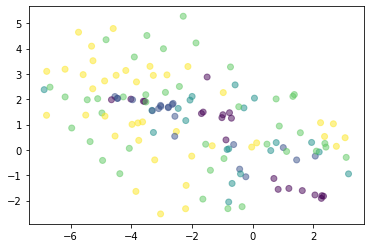

In [28]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c= final_df_1['day'], alpha=0.5);

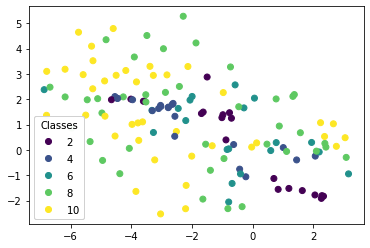

In [29]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c= final_df_1['day'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

In [30]:
#PHATE  

In [31]:
phate_operator = phate.PHATE(n_components=2)
seq_phate = phate_operator.fit_transform(X_new_scaled)

Calculating PHATE...
  Running PHATE on 140 observations and 46748 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.10 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 2.14 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.02 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.03 seconds.
Calculated PHATE in 2.24 seconds.


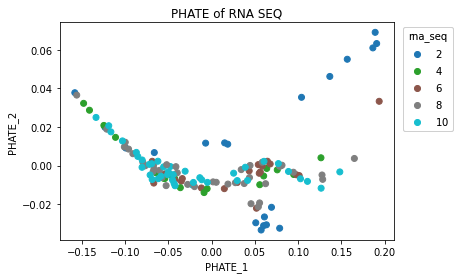

In [32]:
fig, ax = plt.subplots()
scatter = ax.scatter(seq_phate[:,0], seq_phate[:,1], c=final_df_1['day'], cmap = 'tab10')
ax.set_xlabel('PHATE_1')
ax.set_ylabel('PHATE_2')
ax.set_title("PHATE of RNA SEQ")
legend1 = ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1.01, 1),
                    loc="upper left", ncol = 1, title="rna_seq")
ax.add_artist(legend1)
plt.show()

In [33]:
fano = np.square(final_df_1.groupby('day').mean().std()) / final_df_1.groupby('day').mean().mean()

In [34]:
dg = np.log10(1+fano.dropna())
dgenes = dg[dg>1.5]

In [50]:
ind = list(dgenes.index)


In [54]:
final_df_dg = final_df_1.loc[:, ind]

In [55]:
final_df_dg

gene,WBGene00000063,WBGene00000064,WBGene00000065,WBGene00000066,WBGene00000067,WBGene00000098,WBGene00000101,WBGene00000114,WBGene00000118,WBGene00000155,...,WBGene00077526,WBGene00077732,WBGene00185086,WBGene00194674,WBGene00194717,WBGene00219609,WBGene00219800,WBGene00219816,WBGene00219849,WBGene00235164
CE_1,2111,3057,565,461,474,853,625,1382,45,112,...,719,298,341,75,6,647,244,248,174,2
CE_2,2736,4112,723,767,780,1275,890,1948,55,181,...,1244,358,488,117,18,627,395,443,377,2
CE_3,4931,6431,1048,1074,1282,1651,1450,3068,117,235,...,2099,720,812,206,28,1420,951,936,540,4
CE_4,4233,6619,1297,1290,766,2037,1623,2757,124,236,...,1788,741,831,178,17,1217,548,639,500,3
CE_5,3815,5313,980,1128,644,1771,1178,2479,98,276,...,1544,431,613,133,22,1051,585,768,441,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CE_136,5301,5280,1151,1223,355,2812,2213,1228,15,278,...,2501,464,761,8,246,625,151,323,309,342
CE_137,2441,2296,597,783,178,721,574,614,28,63,...,1356,85,130,16,173,211,41,363,80,425
CE_138,5452,6652,1504,1771,52,3499,2425,1647,22,278,...,2319,727,644,37,134,482,125,520,357,356
CE_139,2234,2910,726,686,601,1367,1040,1196,70,126,...,1251,326,507,123,213,322,175,528,276,109


In [ ]:
# recursive feature elimination


In [58]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
X_dg = final_df_dg

clf = RandomForestClassifier(max_depth=7,
                             n_estimators=200,
                             max_features='log2',
                             n_jobs=-1)

rfecv = RFECV(estimator=clf,
              step=1, cv=10,
              scoring='accuracy',
              n_jobs=-1, verbose=1)
rfecv.fit(X_dg, y_new)

rfecv.n_features_

Fitting estimator with 1015 features.
Fitting estimator with 1014 features.
Fitting estimator with 1013 features.
Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting estimator with 1005 features.
Fitting estimator with 1004 features.
Fitting estimator with 1003 features.
Fitting estimator with 1002 features.
Fitting estimator with 1001 features.
Fitting estimator with 1000 features.
Fitting estimator with 999 features.
Fitting estimator with 998 features.
Fitting estimator with 997 features.
Fitting estimator with 996 features.
Fitting estimator with 995 features.
Fitting estimator with 994 features.
Fitting estimator with 993 features.
Fitting estimator with 992 features.
Fitting estimator with 991 features.
Fitting estimator with 990 features.
Fitting estimator with

In [ ]:
#RANDOM_FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features='sqrt', max_depth=5, n_estimators=100, n_jobs=-1)
clf.fit(X_new_scaled,y_new)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_jobs=-1)

In [ ]:
params = {"max_depth": range(7,12), "n_estimators": [100, 150, 200], "max_features":["sqrt","log2"]}
forest_grid = GridSearchCV(clf, params, cv = 5, n_jobs=-1, verbose=True)
forest_grid.fit(X_new_scaled,y_new)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features='sqrt',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': range(7, 12),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [ ]:
forest_grid.best_score_

0.6928571428571428

In [ ]:
forest_grid.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
#-----------------#

In [ ]:
def select_cols(df, num):
  req_l = []
  for i in df.columns:
    if res.loc['day',i] == num:
      req_l.append(i)
  return req_l

  


In [ ]:
def age_dist(num):
  age_x = res[select_cols(res, num)].mean(axis = 1)
  age_x = pd.DataFrame(age_x)
  age_x["gene"] = res["gene"]
  age_x= age_x[age_x[0] != 0]
  age_x.drop("day", axis=0, inplace = True)
  return age_x

In [ ]:
age_dist(2)

,0,gene
0,245.30,WBGene00000001
1,13.95,WBGene00000002
2,7.95,WBGene00000003
3,146.80,WBGene00000004
4,4.40,WBGene00000005
...,...,...
46722,0.10,WBGene00255562
46723,0.05,WBGene00255563
46728,0.15,WBGene00255568
46742,0.05,WBGene00255582


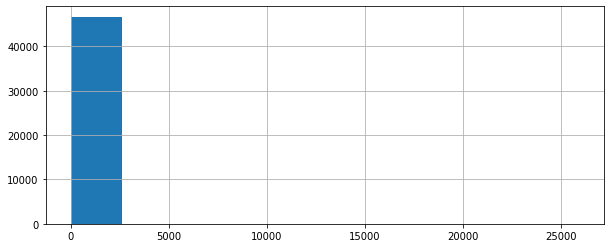

In [ ]:
res['CE_1'].hist(figsize=(10,4))

In [ ]:
##OLD DATA................................................

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CE_exp.tab.gz to CE_exp.tab.gz


In [ ]:

ce = pd.read_csv(io.BytesIO(uploaded['CE_exp.tab.gz']), compression='gzip', sep='\t', skipfooter=5, engine='python')
ce

,#Sample:,CE_1.genome,CE_10.genome,CE_11.genome,CE_12.genome,CE_13.genome,CE_14.genome,CE_15.genome,CE_16.genome,CE_17.genome,...,CE_78.genome,CE_79.genome,CE_8.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome,CE_9.genome
0,2L52.1,2,0,0,0,0,0,0,0,1,...,1,3,0,1,0,0,0,1,0,1
1,2L52.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2RSSE.1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2RSSE.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2RSSE.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,cTel79B.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45457,cTel79B.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45458,cTel7X.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45459,cTel7X.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = sorted(ce.columns[1:], key=lambda col: int(col.split('.')[0].split('_')[1]))
ce = ce[['#Sample:'] + columns]


ce

,#Sample:,CE_1.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome,...,CE_76.genome,CE_77.genome,CE_78.genome,CE_79.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome
0,2L52.1,2,0,1,1,1,1,2,0,1,...,0,3,1,3,1,0,0,0,1,0
1,2L52.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2RSSE.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2RSSE.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2RSSE.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,cTel79B.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45457,cTel79B.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45458,cTel7X.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45459,cTel7X.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ce[columns] += 1 
ce

,#Sample:,CE_1.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome,...,CE_76.genome,CE_77.genome,CE_78.genome,CE_79.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome
0,2L52.1,3,1,2,2,2,2,3,1,2,...,1,4,2,4,2,1,1,1,2,1
1,2L52.2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2RSSE.1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
3,2RSSE.2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2RSSE.3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,cTel79B.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45457,cTel79B.2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45458,cTel7X.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
45459,cTel7X.2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:

nce = ce[columns].apply(lambda x: x.div(x.sum()).mul(1e6), axis=0)
nce['gene'] = ce['#Sample:']
nrlog = nce[['gene']].join(np.log10(nce[columns]))

In [ ]:
nce

,CE_1.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome,CE_10.genome,...,CE_77.genome,CE_78.genome,CE_79.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome,gene
0,2.859482,0.934556,1.076965,1.916759,1.536448,1.628417,1.834277,0.784051,1.935423,1.529651,...,8.487397,2.005759,9.754884,3.155027,0.820808,1.184074,1.735849,2.061664,1.245266,2L52.1
1,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2L52.2
2,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,1.568101,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.1
3,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.2
4,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel79B.1
45457,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel79B.2
45458,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel7X.1
45459,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel7X.2


In [ ]:
nrlog

,gene,CE_1.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome,...,CE_76.genome,CE_77.genome,CE_78.genome,CE_79.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome
0,2L52.1,0.456287,-0.029395,0.032202,0.282568,0.186518,0.211765,0.263465,-0.105656,0.286776,...,0.617489,0.928775,0.302279,0.989222,0.499003,-0.085759,0.073379,0.239512,0.314218,0.095262
1,2L52.2,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
2,2RSSE.1,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,0.195374,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
3,2RSSE.2,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
4,2RSSE.3,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,cTel79B.1,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
45457,cTel79B.2,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
45458,cTel7X.1,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262
45459,cTel7X.2,-0.020834,-0.029395,-0.268828,-0.018462,-0.114512,-0.089264,-0.213656,-0.105656,-0.014254,...,0.617489,0.326715,0.001249,0.387162,0.197973,-0.085759,0.073379,0.239512,0.013188,0.095262


In [ ]:
#Standard scalar

X_std = StandardScaler().fit_transform(ce[columns].values.T)
X_std.shape

(85, 45461)

In [ ]:
sklearn_pca = sklearnPCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn

array([[ 6.25378538e+01, -3.51499480e+01, -3.44714374e+01,
         6.49054028e+00,  6.76770542e+00],
       [ 4.80423487e+01, -5.84779649e+01, -7.28335244e-01,
         2.48234469e+00, -6.34789146e-01],
       [ 1.74964659e+02, -1.11701794e+02, -4.53315001e+01,
         4.27999201e+01,  1.45919527e+01],
       [ 5.94849380e+01, -2.85063857e+01, -1.89558739e+01,
        -1.09523265e+01, -7.83889758e+00],
       [ 1.04296295e+02, -6.84303535e+01, -2.73200678e+01,
         1.15164082e+01,  5.00167285e-01],
       [ 1.04336112e+02, -2.26054942e+01, -1.08361797e+01,
        -3.02014827e+01, -1.69243659e+01],
       [ 1.43010882e+02, -9.85063088e+01, -1.41280411e+01,
         2.55881419e+01,  5.28711017e+00],
       [ 8.78477229e+01, -6.79839901e+01, -4.36670216e+01,
         1.69001247e+01,  9.79937696e+00],
       [ 5.97102263e+01, -4.26538186e+01, -2.86415129e+01,
        -5.27786956e+00, -5.46837305e+00],
       [-2.10333121e+01, -3.77193202e+01,  7.36004760e-01,
        -5.56301304e+00

In [ ]:
sklearn_pca.explained_variance_

array([5651.15723184, 1921.1614059 ,  883.99642644,  682.49781259,
        540.07729631])

In [ ]:

sklearn_pca.explained_variance_ratio_

array([0.24511381, 0.08332863, 0.03834254, 0.02960239, 0.02341238])

In [ ]:
pca_df = pd.DataFrame()   
pca_df['group'] = pd.Categorical([i // 20 for i in range(85)])
pca_df['PC1'] = Y_sklearn[:,0]
pca_df['PC2'] = Y_sklearn[:,1]
pca_df['PC3'] = Y_sklearn[:,2]
pca_df['PC4'] = Y_sklearn[:,3]

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


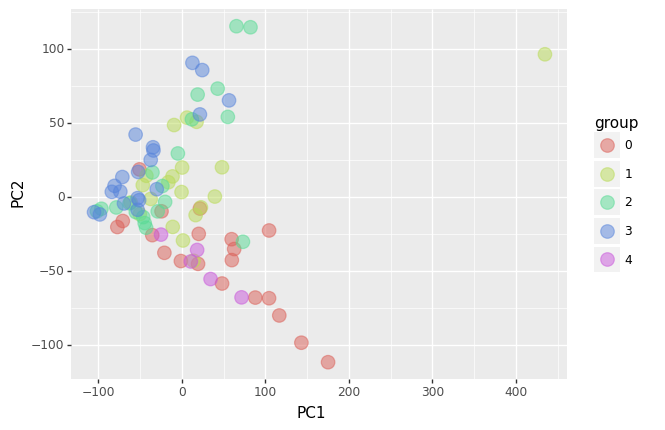

<ggplot: (8777913652929)>

In [ ]:
(ggplot(pca_df, aes(x='PC1', y='PC2', color='group'))
    + geom_point(size=5, alpha=0.5)
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


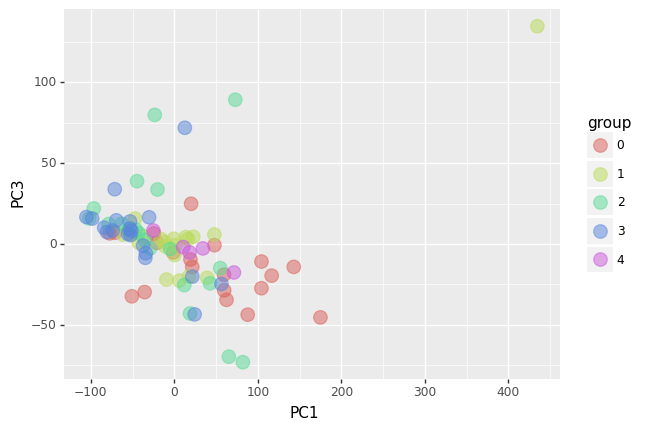

<ggplot: (8777913662761)>

In [ ]:
(ggplot(pca_df, aes(x='PC1', y='PC3', color='group'))
    + geom_point(size=5, alpha=0.5)
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


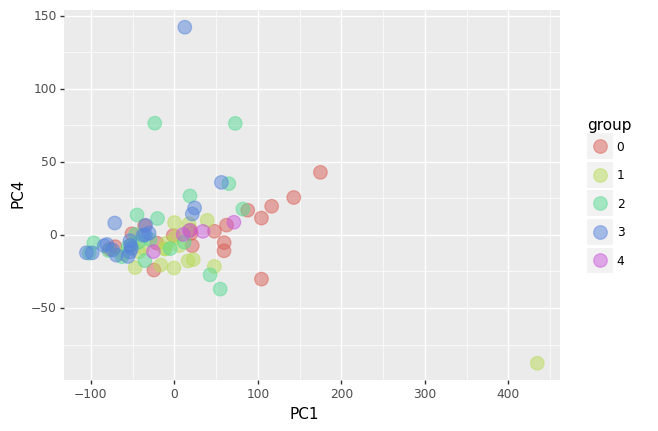

<ggplot: (8777915187993)>

In [ ]:
(ggplot(pca_df, aes(x='PC1', y='PC4', color='group'))
    + geom_point(size=5, alpha=0.5)
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


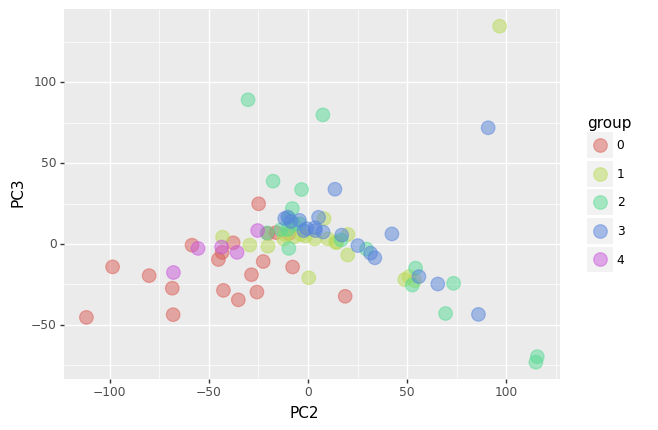

<ggplot: (8777915185957)>

In [ ]:
(ggplot(pca_df, aes(x='PC2', y='PC3', color='group'))
    + geom_point(size=5, alpha=0.5)
)

In [ ]:
nce

,CE_1.genome,CE_2.genome,CE_3.genome,CE_4.genome,CE_5.genome,CE_6.genome,CE_7.genome,CE_8.genome,CE_9.genome,CE_10.genome,...,CE_77.genome,CE_78.genome,CE_79.genome,CE_80.genome,CE_81.genome,CE_82.genome,CE_83.genome,CE_84.genome,CE_85.genome,gene
0,2.859482,0.934556,1.076965,1.916759,1.536448,1.628417,1.834277,0.784051,1.935423,1.529651,...,8.487397,2.005759,9.754884,3.155027,0.820808,1.184074,1.735849,2.061664,1.245266,2L52.1
1,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2L52.2
2,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,1.568101,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.1
3,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.2
4,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,2RSSE.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45456,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel79B.1
45457,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel79B.2
45458,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel7X.1
45459,0.953161,0.934556,0.538483,0.958379,0.768224,0.814208,0.611426,0.784051,0.967711,1.529651,...,2.121849,1.002879,2.438721,1.577513,0.820808,1.184074,1.735849,1.030832,1.245266,cTel7X.2


In [ ]:
columns = nce.columns[:-1]
X = nce[columns].T
X['group'] = [i // 20 for i in range(85)]

# Special case: worms 81-84 are from group 0
X.loc[X['group']==4, 'group'] = 0
y = X['group']
X = X[X.columns[:-1]]
X

,0,1,2,3,4,5,6,7,8,9,...,45451,45452,45453,45454,45455,45456,45457,45458,45459,45460
CE_1.genome,2.859482,0.953161,0.953161,0.953161,0.953161,0.953161,0.953161,0.953161,0.953161,0.953161,...,0.953161,0.953161,0.953161,0.953161,14.297411,0.953161,0.953161,0.953161,0.953161,0.953161
CE_2.genome,0.934556,0.934556,0.934556,0.934556,0.934556,0.934556,0.934556,0.934556,0.934556,0.934556,...,0.934556,0.934556,0.934556,0.934556,13.083782,0.934556,0.934556,0.934556,0.934556,0.934556
CE_3.genome,1.076965,0.538483,0.538483,0.538483,0.538483,0.538483,0.538483,0.538483,0.538483,0.538483,...,0.538483,0.538483,0.538483,2.153931,9.154205,0.538483,0.538483,0.538483,0.538483,0.538483
CE_4.genome,1.916759,0.958379,0.958379,0.958379,0.958379,0.958379,0.958379,0.958379,0.958379,0.958379,...,0.958379,0.958379,0.958379,1.916759,20.125969,0.958379,0.958379,0.958379,0.958379,0.958379
CE_5.genome,1.536448,0.768224,0.768224,0.768224,0.768224,0.768224,0.768224,0.768224,0.768224,0.768224,...,0.768224,0.768224,0.768224,3.841119,15.364476,0.768224,0.768224,0.768224,0.768224,0.768224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CE_81.genome,0.820808,0.820808,0.820808,0.820808,0.820808,0.820808,0.820808,0.820808,0.820808,0.820808,...,0.820808,0.820808,0.820808,4.104039,6.566462,0.820808,0.820808,0.820808,0.820808,0.820808
CE_82.genome,1.184074,1.184074,1.184074,1.184074,1.184074,1.184074,1.184074,1.184074,1.184074,1.184074,...,1.184074,1.184074,1.184074,2.368147,9.472590,1.184074,1.184074,1.184074,1.184074,1.184074
CE_83.genome,1.735849,1.735849,1.735849,1.735849,1.735849,1.735849,1.735849,1.735849,1.735849,1.735849,...,1.735849,1.735849,1.735849,1.735849,6.943396,1.735849,1.735849,1.735849,1.735849,1.735849
CE_84.genome,2.061664,1.030832,1.030832,1.030832,1.030832,1.030832,1.030832,1.030832,1.030832,1.030832,...,1.030832,1.030832,1.030832,1.030832,12.369986,1.030832,1.030832,1.030832,1.030832,1.030832


In [ ]:
y

CE_1.genome     0
CE_2.genome     0
CE_3.genome     0
CE_4.genome     0
CE_5.genome     0
               ..
CE_81.genome    0
CE_82.genome    0
CE_83.genome    0
CE_84.genome    0
CE_85.genome    0
Name: group, Length: 85, dtype: int64

In [ ]:
y.head(30)

CE_1.genome     0
CE_2.genome     0
CE_3.genome     0
CE_4.genome     0
CE_5.genome     0
CE_6.genome     0
CE_7.genome     0
CE_8.genome     0
CE_9.genome     0
CE_10.genome    0
CE_11.genome    0
CE_12.genome    0
CE_13.genome    0
CE_14.genome    0
CE_15.genome    0
CE_16.genome    0
CE_17.genome    0
CE_18.genome    0
CE_19.genome    0
CE_20.genome    0
CE_21.genome    1
CE_22.genome    1
CE_23.genome    1
CE_24.genome    1
CE_25.genome    1
CE_26.genome    1
CE_27.genome    1
CE_28.genome    1
CE_29.genome    1
CE_30.genome    1
Name: group, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features='sqrt', max_depth=5, n_estimators=100, n_jobs=-1)
clf.fit(X,y)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_jobs=-1)

In [ ]:

clf.feature_importances_
features = clf.feature_importances_ > 0
clf.feature_importances_[features]


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth": range(7,12), "n_estimators": [100, 150, 200], "max_features":["sqrt","log2"]}
forest_grid = GridSearchCV(clf, params, cv = 5, n_jobs=-1, verbose=True)
forest_grid.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features='sqrt',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': range(7, 12),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [ ]:
forest_grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features='sqrt', n_jobs=-1)

In [ ]:
forest_grid.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
forest_grid.best_score_

0.623529411764706